<img src="Images\GMIT logo.jpeg" width="350" align="center">

# Fundamentals of Data Analysis Project 2019

<b>Name:</b> Peter McGowan<br>
<b>ID:</b> G00190832

## Introduction

Placeholder: images and intro

## Setup

In [1]:
# Import pandas for managing data
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Magic command to ensure that plots render inline
%matplotlib inline

In [2]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

The tips dataset is conveniently included with Seaborn as a Pandas dataframe - so I can call it directly. I'll load it as "df".

In [3]:
df = sns.load_dataset("tips")

## Description

### Checking the Dataset

Before producing descriptive statistics, its a good idea to check the integrity and completeness of the dataset.

In [4]:
# Check the head
df.head(n=5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the tail
df.tail(n=5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Generate info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Checking against the [Github page](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) for the tips dataset, I expect to see 244 entries - the data import has been successful and now I can move onto to a more detailed analysis.

### Basic Statistics

The describe() function in Pandas is very useful for an initial look at the properties of a dataset. I've also rounded all outputs to three decimal places - as I am most interested in analysing monetary amounts (which should be given to two decimal places), an additional decimal place should be sufficient for the purposes of analysis.

In [7]:
# Describe the dataset
round(df.describe(),3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


Describe() only produces an output on numerical columns - here it includes columns for total_bill (the total bill amount - a float), tip (the tip amount associated with the bill - float) and size (the size of the party billed - integer). I can make the following observations:
* Each column has a count of 244, indicating that there are no missing values;
* The means seem reasonable (pending an analysis of the distribution) - just under \\$20 for the mean total bill, a mean tip of \\$3 (equating to 15% of the average total bill which seems realistic) and the mean party size is just over 2.5;
* The Standard Deviation indicates the dispersion - as expected, the total bill has a fairly wide dispersion whereas the smaller values for tip and size shows that their values tend relatively closely to the mean;
* The Min and Max values lead to some interesting observations:
    * The smallest bill recorded is quite low (\\$3.07) - most likely referring to a single customer ordering 1-2 items. The largest bill is \\$50.81 which seems fairly unremarkable;
    * The smallest tip is \\$1.00 - tipping with a single dollar bill seems likely. The largest tip is $10.00 - another convenient denomination of money;
    * The size varies between 1 and 6. A minimum different to 1 would be unusual, whereas 6 may represent the largest table size available;
* The percentiles (25%, 50%/ median, 75%) are quite in line with the other observations. The median value is lower than the mean for all columns - I would therefore expect that the distribution of all columns is not particularly symmetrical.

Before moving on I'll also sum the numerical columns to get an appreciation of what the dataset represents.

In [8]:
# Sum numerical columns only
df.sum(axis = 0, skipna = True, numeric_only = True)

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64

Therefore the dataset is representing a total of 627 customers in 244 parties, spending a total of \\$4827.77 and tipping \\$731.58 on that.

### Distribution

The aim of this analysis mainly is to investigate whether a relationship exists between the total bill and the tip. Firstly I will look at the distribution - I had make several assumptions above that I'd like to check out. I'll display the histograms of both columns using Seaborn's distplot() function. I also want to see the mean dollar value for each, so I'll display it as a vertical dashed line with the same colour as the distplot.

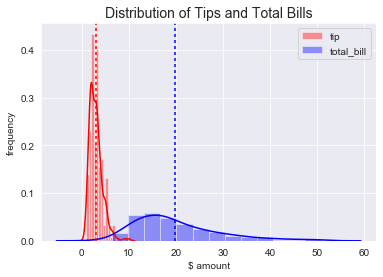

In [9]:
# Visualising the distribution of the total_bill and tip columns
sns.distplot(df['tip'], label = "tip", color = 'r')
sns.distplot(df['total_bill'], label = "total_bill", color = 'b')
#sns.distplot(df['size'], label = "size")
plt.xlabel("$ amount")
plt.ylabel("frequency")

plt.axvline(x = np.mean(df['tip']), color = 'r', dashes=(2,2,2,2))
plt.axvline(x = np.mean(df['total_bill']), color = 'b', dashes=(2,2,2,2))

plt.title('Distribution of Tips and Total Bills', fontsize=14)
plt.legend()

The distplot() in Seaborn includes a number of elements that can be seen in this example. The x-axis here displays the variable being analysed, whilst the y-axis shows the frequency of observations between 0.0 (0%) and 1.0 (100%). The observations are grouped into a numbeer of "bins", i.e. divisions of the range of data - this can be manually controlled but here I have let Seaborn select it. These bins are displayed as rectangles, the horizontal extent showing the range of the bin, whereas the vertical extent displays the frequency of observations within the bin. Additionally, this plot includes a Kernal Density Estimate (KDE) plot overlaid on it - this can be thought of as a line marking the probability of variable frequencies based on a limited number of observations. This results in a smoothed line which aids in understanding the distribution of the data being analysed.

*** https://statistics.laerd.com/statistical-guides/understanding-histograms.php
*** https://mathisonian.github.io/kde/

In [10]:
# importing scipy.stats to use the skewness function
import scipy.stats as ss

In [11]:
print("tip skewness: ", ss.skew(df['tip']))
print("total_bill skewness: ", ss.skew(df['total_bill']))

tip skewness:  1.4564266884221506
total_bill skewness:  1.1262346334818638


Both figures are positive, confirming that the columns are both positively skewed.

Before moving on I'd like to look into the non-numerical columns a little:
* sex: male or female;
* smoker: yes or no;
* day: the values in the head() and tail() outputs only show certain days - it's worth having a look in more detail to see if it only covers certain days;
* time: only dinner is shown in the head() and tail() outputs - I'll investigate this further also;

Firstly I'll generate the unique values for the day column and the time column respectively.

In [12]:
df.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [13]:
df.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

There are therefore only records for Thursday through Sunday, and for Lunch and Dinner. I can plot the distributions of these separately:

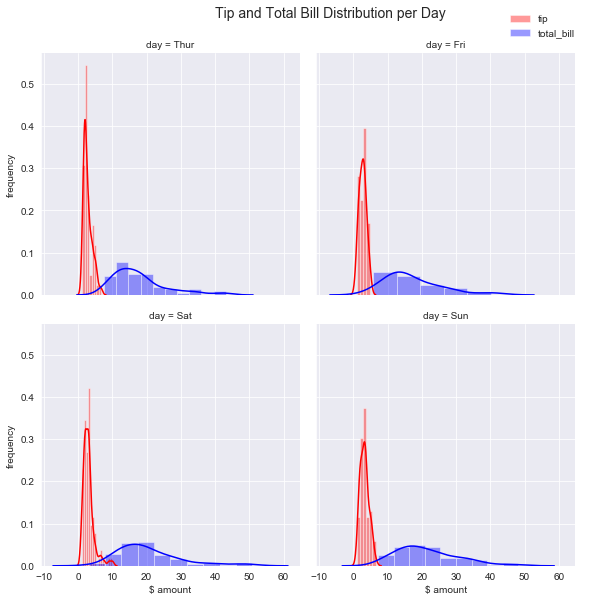

In [14]:
# Build a 2x2 facet grid plot with a distplot for each unique value in the "day" column
g = sns.FacetGrid(df, col="day", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[2].set_xlabel('$ amount')
g.axes[3].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')
g.axes[2].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Day', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

This tells us that the distributions are slightly different on each day for both tips and total_bill. In addition, the peaks for both are somewhat higher on the Thrursday than for the other three days. I'll also plot the distribution of each for Lunch and Dinner separately:

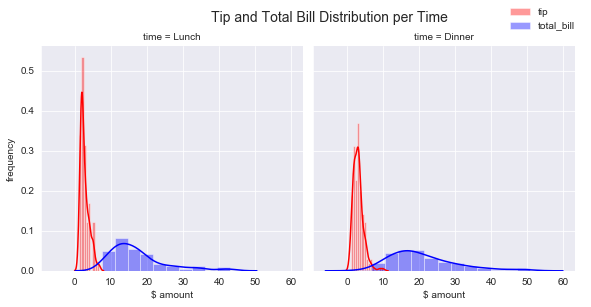

In [15]:
# Build a 1x2 facet grid plot with a distplot for each unique value in the "time" column
g = sns.FacetGrid(df, col="time", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[0].set_xlabel('$ amount')
g.axes[1].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Time', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

The distribution of the tip and total_bill columns are both narrower for lunch bills than for dinner bills. There is therefore a smaller variation in both tips and bills for lunches rather than dinners.

## Regression

Next we need to determine whether or not there is a relationship between the total bill and tip amount.

### Visually Relating Tips and Total Bills

Firstly, it will be helpful to look at some visual comparisons.

We can plot boxplots of the tip and total_bill columns. Instead of creating separate plots it should be easier to appreciate their similarities and differences by displaying on a single plot. This will require the dataframe to be "melted" - it will be restructured with columns combined etc. In this case we will create a melted dataframe with the following:
* day - unpivoted;
* time - unpivoted;
* item - new column, its value will state whether the row refers to a tip or a total_bill;
* amount - a float with the tip or total_bill amount as appropriate.

*** https://www.geeksforgeeks.org/python-pandas-melt/

In [16]:
# Set the day and time columns as id_vars - this will ensure that they remain unpivoted
dfmelted = df.melt(id_vars=["day", "time"], value_vars=["total_bill", "tip"], var_name="item", value_name="amount")
dfmelted

,day,time,item,amount
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
5,Sun,Dinner,total_bill,25.29
6,Sun,Dinner,total_bill,8.77
7,Sun,Dinner,total_bill,26.88
8,Sun,Dinner,total_bill,15.04
9,Sun,Dinner,total_bill,14.78


The melted dataframe contains 488 rows - as the original dataframe contained 244, and we melted two columns together, this is correct. The boxplots can now be generated.

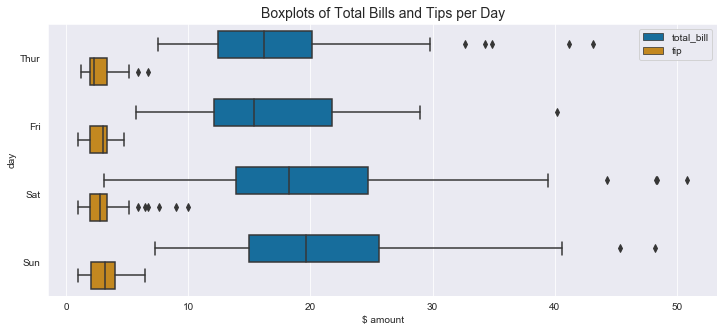

In [17]:
# Set size in order to see plot elements correctly
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(data=dfmelted, y="day", x="amount", hue="item")

plt.xlabel("$ amount")

plt.title('Boxplots of Total Bills and Tips per Day', fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

The boxplot (or box and whisker plot) is a useful plot which can graphically display some properties of the variable being analysed quite well:
* The x-axis here is displaying the variable being measured - the amount column of our melted dataframe which is actually a combination of our tip amounts and total bill amounts;
* The rectangular box with its left and right extents showing the lower and upper quartile respectively, whilst the median is shown as a vertical line within the box;
* Whiskers extending to either side of the box covering a range equal to 1.5 times the interquartile range (upper quartile - lower quartile) maximum, or to the extent of observations;
* Outlier markers (diamond-shaped), for data points that are outside of the whiskers.

*** https://mathisonian.github.io/kde/
*** https://stattrek.com/statistics/charts/boxplot.aspx

There are some interesting takeaways from this plot:
* The outliers (where present) are all above the upper quartile;
* Total bills are generally higher on Saturdays and Sundays but also have a wider range in general than those on Thursdays and Fridays;
* The tip ranges on Thursdays and Fridays are quite similar, particularly in terms of lower and upper quartile. Saturday's tips have a similar interquartile range but also a significant number of outliers whereas the range for Sundays's tips include no outliers but have a higher median and upper quartile as well as a wider interquartile range.

### Bivariate Plots

The previous plots shown can be categorised as univariate plots as they display data about a single variable in the dataset. We can now move on to looking at bivariate plots which can relate two variables on a single plot - this will be necessary for understanding the relationships between the variables.

Seaborn's jointplot is convenient for an initial look at the relationship between total bills and tips. It is implemented below with a number of elements:
1. A central "regression plot", combining:
    1. A scatterplot - a simple x-y plot of variables;
    2. A line showing a "linear regression" model fit, with a 95% confidence interval;
2. A 2-D KDE plot with 10 "levels" overlaid on the regression plot, emphasising the density of observations;
3. A complementary distplot (including KDE plot) on each axis, showing tips and total bill.

*** http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html

Text(0.5, 1.03, 'Jointplot - Tips vs Total Bill Amounts')

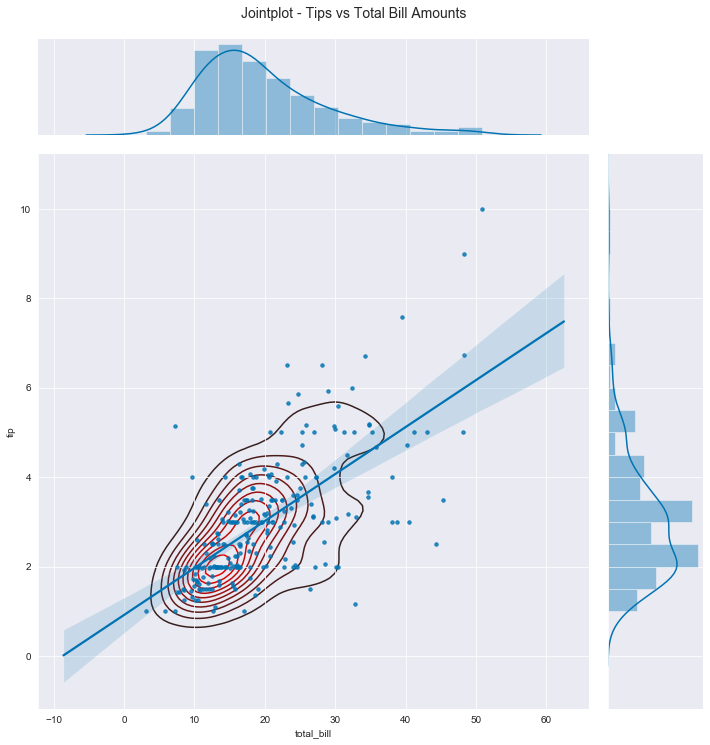

In [18]:
g = sns.jointplot(x ='total_bill', y ='tip', kind="reg", ci=95, height=10, data = df, scatter_kws={"s": 12}).plot_joint(sns.kdeplot, zorder=0, n_levels=10, color="r")

g.fig.suptitle("Jointplot - Tips vs Total Bill Amounts", y=1.03, fontsize=14)

Particularly with the aid of the 2-D KDE plot and the linear regression line, we can see that it is likely that some sort of relationship can be said to exist between the total bills and tips.

We can now concentrate on visualising the linear relationship through the observations with lmplot(). Firstly looking at the entire dataset gives us a similar output to the jointplot, with unnecessary detail stripped away:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills')

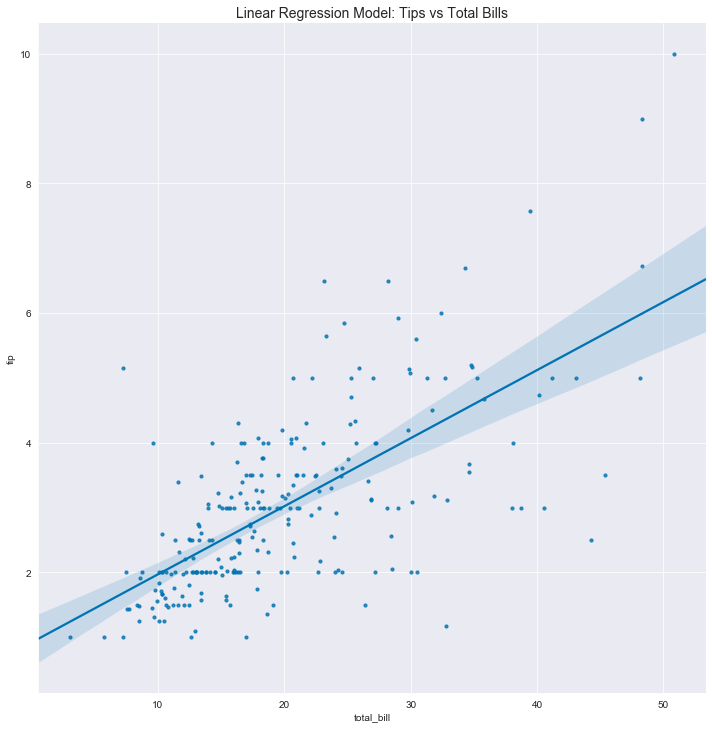

In [42]:
sns.lmplot(x="total_bill", y="tip", data=df, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills', fontsize=14)

*** http://benalexkeen.com/correlation-in-python/
*** https://www.spss-tutorials.com/pearson-correlation-coefficient/
*** https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

This looks to be reasonably representative, but it may be helpful to do some additional calculations. Using Numpy, we can calcualte the correlation coefficient as a 2x2 matrix (representing x/x, x/y, y/x, y/y). From this, we can then work out the $R^2$ value of the line.

In [73]:
R = np.corrcoef(df['total_bill'], df['tip'])
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.67573411]
 [0.67573411 1.        ]]

R Squared:  0.4566165863516758


The result is an $R^2$ of approx. 45.66%. Therefore the model somewhat fits the data and we can be reasonably confident that there is a relationship between the total bill and the tip amount, although there are probably other factors at play also.

*** https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb

The Cost function can also be calculated to assess the difference between the real values and the best-fit line. It can be calculated as follows: <br><br>$$ Cost(m,c) = {\sum_i (y_i - m x_i - c )^2}$$

Although we have some of the required data, we will also need to calculate the slope (m) and the y-intercept (c). The slope can be calculated using the following equation: <br><br>$$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$$

Where:
* $x_i, y_i$ = ith value of x, y
* $\bar{x}, \bar{y}$ = mean value of x, y


Once the slope has been calculated, the y-intercept can be worked out as follows: $$ c = \bar{y} - m \bar{x} $$

In [49]:
# Calculate slope (m) and y-intercept (c)

# Create variables to hold the values of the relevant columns
x_i = df['total_bill']
y_i = df['tip']

# Create variables to hold the mean values of the relevant columns
x_mean = np.mean(df['total_bill'])
y_mean = np.mean(df['tip'])

# Calculate m
m = np.sum((x_i - x_mean) * (y_i - y_mean)) / np.sum((x_i - x_mean)**2)

# Calculate c
c = y_mean - m * x_mean

print("m: %10.8f\nc: %10.8f" % (m, c))

m: 0.10502452
c: 0.92026961


I can also try out the numpy polyfit() function that will output m and c as elements of a 1x1 array.

In [65]:
PF = np.polyfit(df['total_bill'], df['tip'], 1)
print("Polyfit")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit
m: 0.10502452
c: 0.92026961


The results match those manually calculated, so we can feel comfortable using this function for further analysis.

Now that we have m and c, the Cost function can be used:

In [67]:
# Implement the Cost Function
C = np.sum((y_i - (m * x_i) - c)**2)
print("Cost:", C)

Cost: 252.78874385077603


The cost is approx. 252.79. A lower cost will indicate a better fit - this figure in isolation doesn't tell us too much, but it will be a useful baseline for when we carry out further analysis.

** Discussion of the above
** Coefficient of determination??

** Add discussion on model fitting, further checks etc https://seaborn.pydata.org/tutorial/regression.html

## Analyse

### Using the Data

*** We now have some handle on the data - what it consists of and the distribution of some of its variables. But what is it useful for? It will be helpful to take the point of view of an employee of the restaurant. For convenience we'll assume that the employee waits tables on certain days of the week and has recorded certain information over a number of shifts with the aim of selecting work patterns that will maximise their earnings -  i.e. the employee wants to choose shifts and tables in order to get the largest tips!

Earlier, we had noted that, whilst the linear regression model fitted reasonably well, it probably wasn't telling the entire story. This means that other factors are likely affecting the value of the tips. We can now delve into the other variables and check if they are having an effect on the linear regression model.

### Tips vs Total Bills on Different Days

We had previously noted that bills and tips were distributed differently on different days. Now we can plot an lmplot() distinguishing the data points by day.

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills by Day')

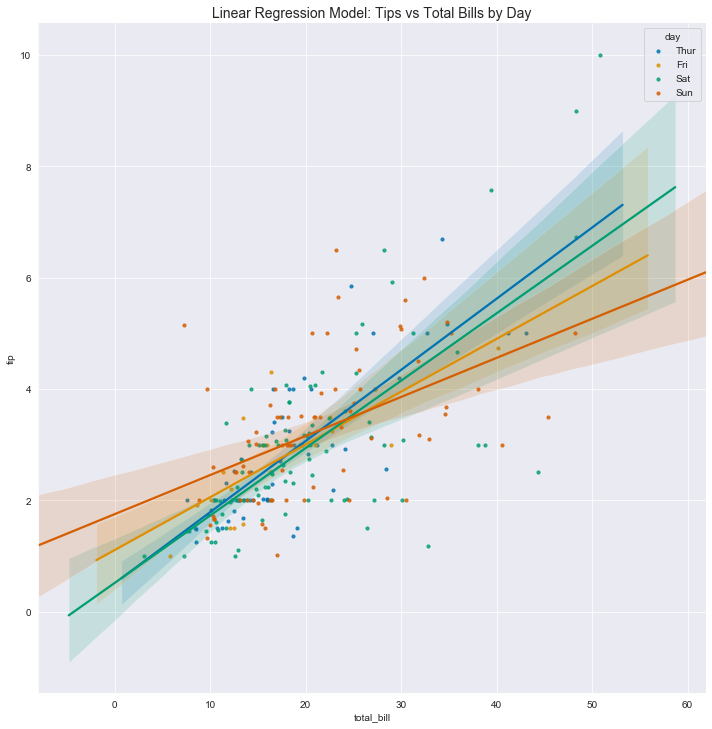

In [43]:
sns.lmplot(x="total_bill", y="tip", hue="day", ci=95, data=df, scatter_kws={"s": 10}, legend_out=False, height=10)

plt.title('Linear Regression Model: Tips vs Total Bills by Day', fontsize=14)

Interestingly this generates 4 slightly different linear regression models. There is some overlap of the confidence intervals but they are different enough to tell us that the day seems to have an effect on the relationship between tips and total bills. Before we take it at face value its a good idea to assess the fit of each model individually - this will make it easier to check if they are accurate.

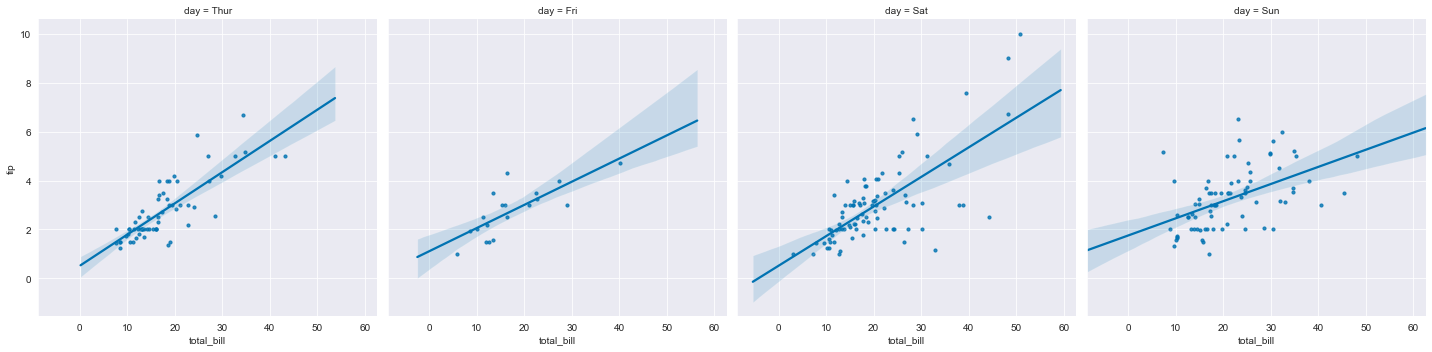

In [21]:
g = sns.lmplot(x="total_bill", y="tip", col="day", data=df, ci=95, scatter_kws={"s": 10})

#### Thursday

Taking Thursday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Thursday')

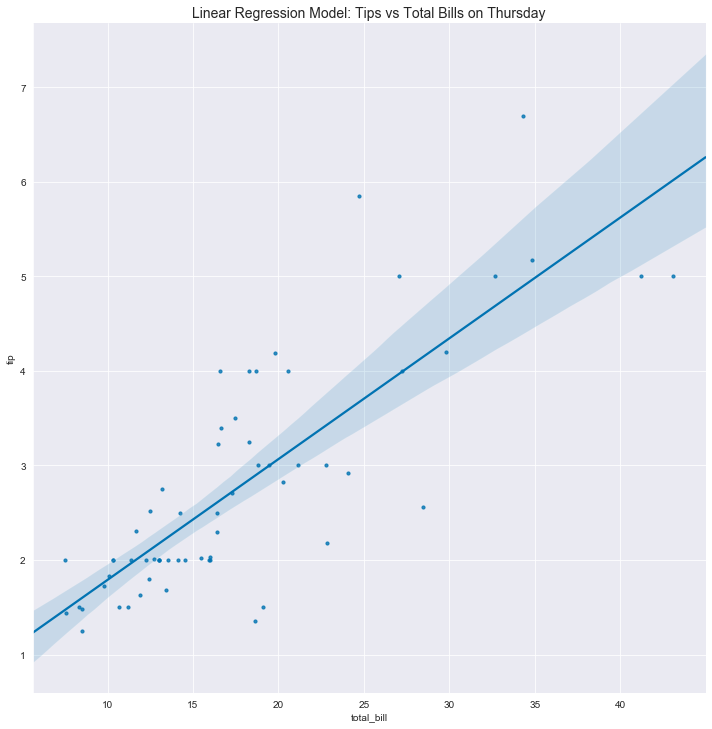

In [62]:
dfThur = df.query('day == "Thur"')

sns.lmplot(x="total_bill", y="tip", data=dfThur, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Thursday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [77]:
# R Squared for Thursday
x = dfThur["total_bill"]
y = dfThur["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.        0.8124063]
 [0.8124063 1.       ]]

R Squared:  0.6600040012990778


In [78]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Thursday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Thursday: 
m: 0.12776355
c: 0.51224166


In [81]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Thursday: ", C)

Cost for Thursday:  31.900930149278718


The results are as follows:
* $R^2$: Around 66%
* Cost: Approx 31.90

These results indicate that the model fits the data on this day noticeably better than the overall fit of the dataset.

#### Friday

Taking Friday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Friday')

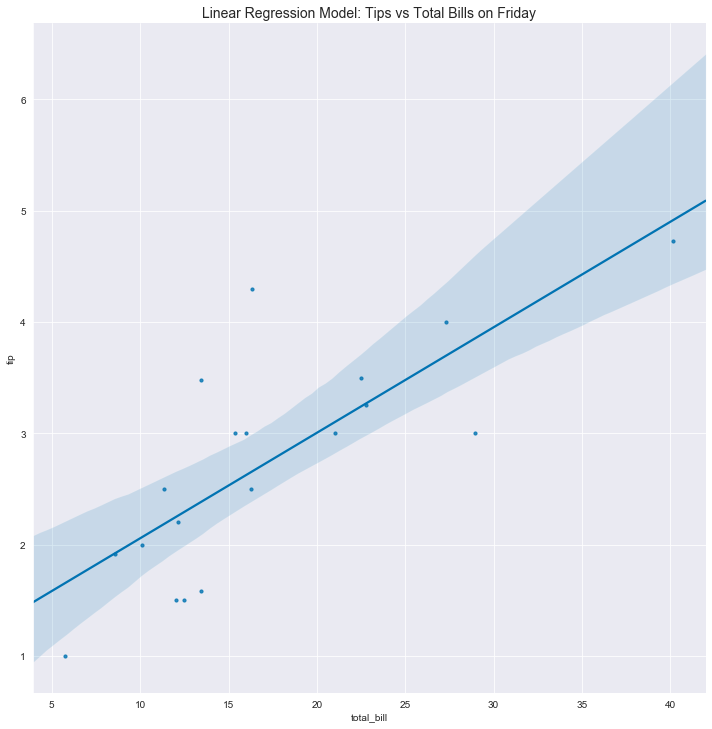

In [86]:
dfFri = df.query('day == "Fri"')

sns.lmplot(x="total_bill", y="tip", data=dfFri, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Friday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [87]:
# R Squared for Friday
x = dfFri["total_bill"]
y = dfFri["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.77193383]
 [0.77193383 1.        ]]

R Squared:  0.5958818313145857


In [84]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Friday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Friday: 
m: 0.09479445
c: 1.10886240


In [88]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Friday: ", C)

Cost for Friday:  7.561727302302218


The results are as follows:
* $R^2$: Around 59.59%
* Cost: Approx 7.56

These results indicate that the model fits the data on this day noticeably better than the overall fit of the dataset.

#### Saturday

Taking Saturday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Saturday')

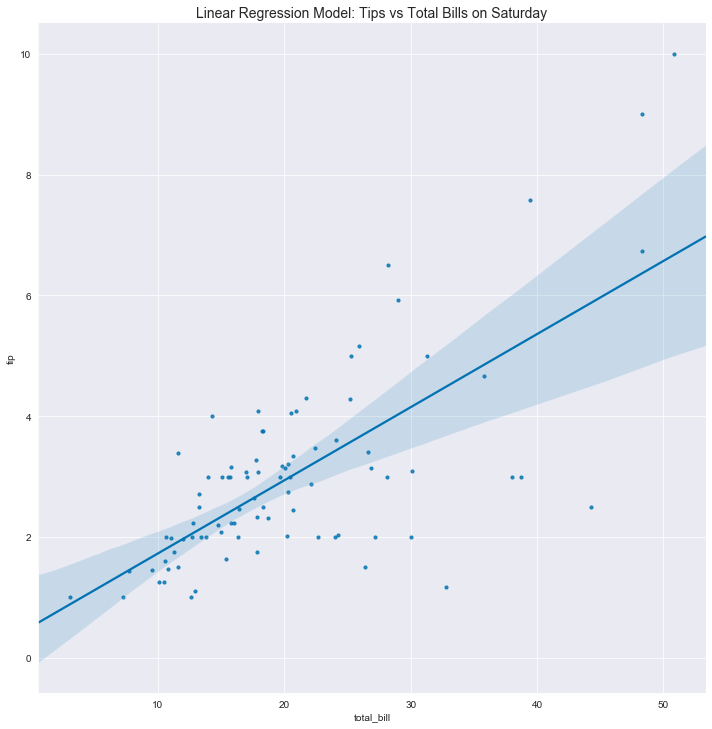

In [89]:
dfSat = df.query('day == "Sat"')

sns.lmplot(x="total_bill", y="tip", data=dfSat, ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Saturday', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [90]:
# R Squared for Saturday
x = dfSat["total_bill"]
y = dfSat["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.70363213]
 [0.70363213 1.        ]]

R Squared:  0.49509817306966714


In [91]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Saturday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Saturday: 
m: 0.12105310
c: 0.51861109


In [92]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Saturday: ", C)

Cost for Saturday:  115.51036051983625


The results are as follows:
* $R^2$: Around 49.51%
* Cost: Approx 115.51

These results indicate that the model fits the data on this day somewhat better than the overall fit of the dataset, but not as well as on Thursday or Friday.

#### Sunday

Taking Sunday, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills on Sunday')

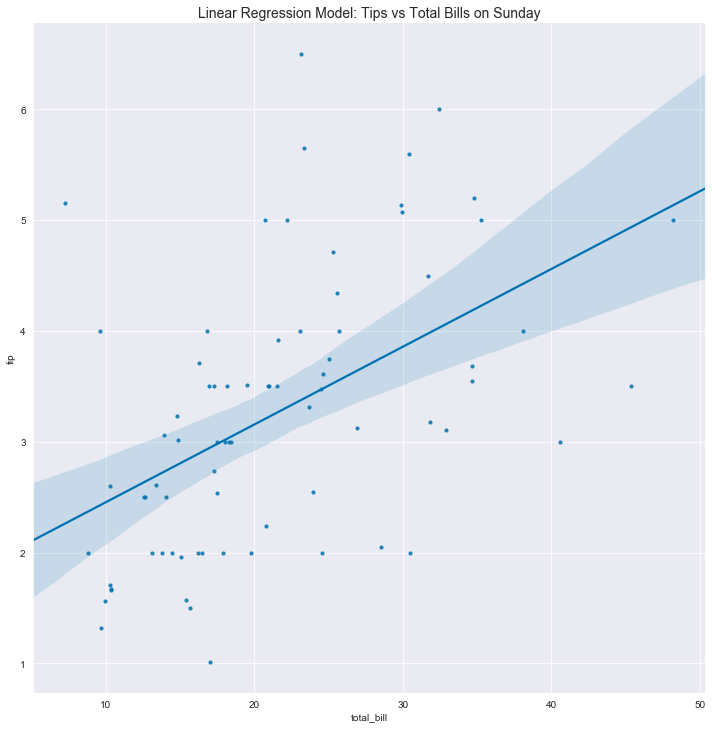

In [93]:
dfSun = df.query('day == "Sun"')

sns.lmplot(x="total_bill", y="tip", data=dfSun , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills on Sunday', fontsize=14)

The linear regression plot looks much less representative than the others, this does not inspire confidence for the remainder of the calculations for Sunday. Next we will calculate the $R^2$ value:

In [94]:
# R Squared for Sunday
x = dfSun["total_bill"]
y = dfSun["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.50175271]
 [0.50175271 1.        ]]

R Squared:  0.2517557802128974


In [95]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Sunday: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Sunday: 
m: 0.07015353
c: 1.75314449


In [96]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Sunday: ", C)

Cost for Sunday:  85.57646595925313


The results are as follows:
* $R^2$: Around 25.18%
* Cost: Approx 85.58

These results are not as encouraging as those for other days. Although the Cost function is much better than on the overall dataset, the $R^2$ is significantly worse.

#### Results

Breaking it down by day does seem to give a more accurate linear model. We can therefore be confident that there is a relationship between day and tip size also. However, there remains some room for improvement, therefore other variables are likely to be having an impact also.

### Tips vs Total Bills for Different Mealtimes

Perhaps the mealtime will have some bearing on the tips also. First we will plot an lmplot() distinguishing the data points by time:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills by Time')

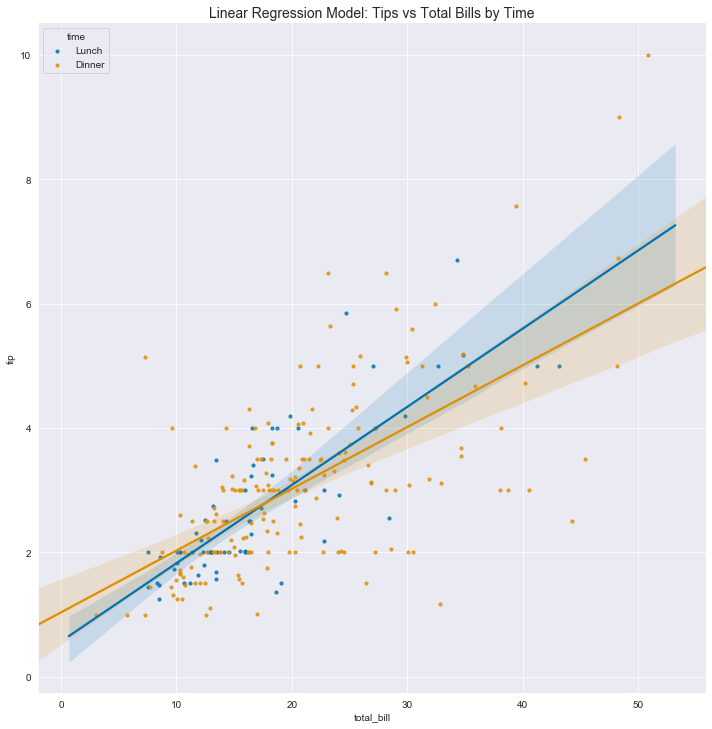

In [97]:
sns.lmplot(x="total_bill", y="tip", hue="time", ci=95, data=df, scatter_kws={"s": 10}, legend_out=False, height=10)

plt.title('Linear Regression Model: Tips vs Total Bills by Time', fontsize=14)

This time we get a pair of slightly different linear regression models. Again we can check their validity by plotting individually.

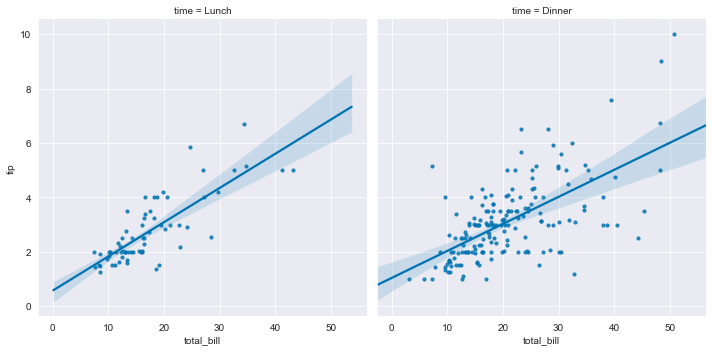

In [23]:
g = sns.lmplot(x="total_bill", y="tip", col="time", data=df, ci=95, scatter_kws={"s": 10})

The plot for Lunch looks quite good - the Dinner plot is more dispersed but is still acceptable.

#### Lunch

Taking Lunch, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills at Lunchtime')

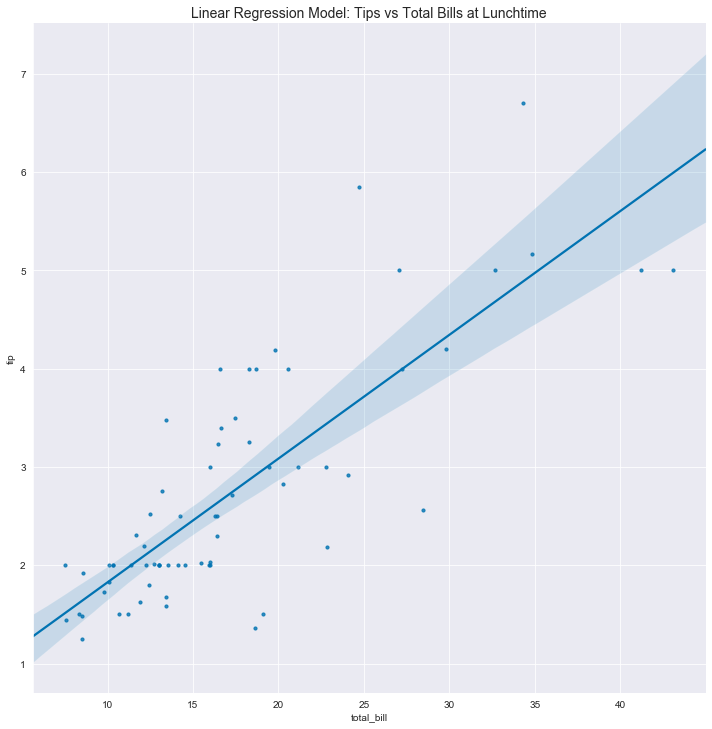

In [102]:
dfLunch = df.query('time == "Lunch"')

sns.lmplot(x="total_bill", y="tip", data=dfLunch , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills at Lunchtime', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [99]:
# R Squared for Sunday
x = dfLunch["total_bill"]
y = dfLunch["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.80542384]
 [0.80542384 1.        ]]

R Squared:  0.6487075561600327


In [100]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Lunchtime: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Lunchtime: 
m: 0.12585284
c: 0.56736162


In [101]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Lunchtime: ", C)

Cost for Lunchtime:  34.19531637403248


The results are as follows:
* $R^2$: Around 64.87%
* Cost: Approx 34.20

These results are quite good - so far this is a much better fit than the overall dataset.

#### Dinner

Taking Dinner, we can extract its data from the dataframe and plot it individually:

Text(0.5, 1, 'Linear Regression Model: Tips vs Total Bills at Dinner')

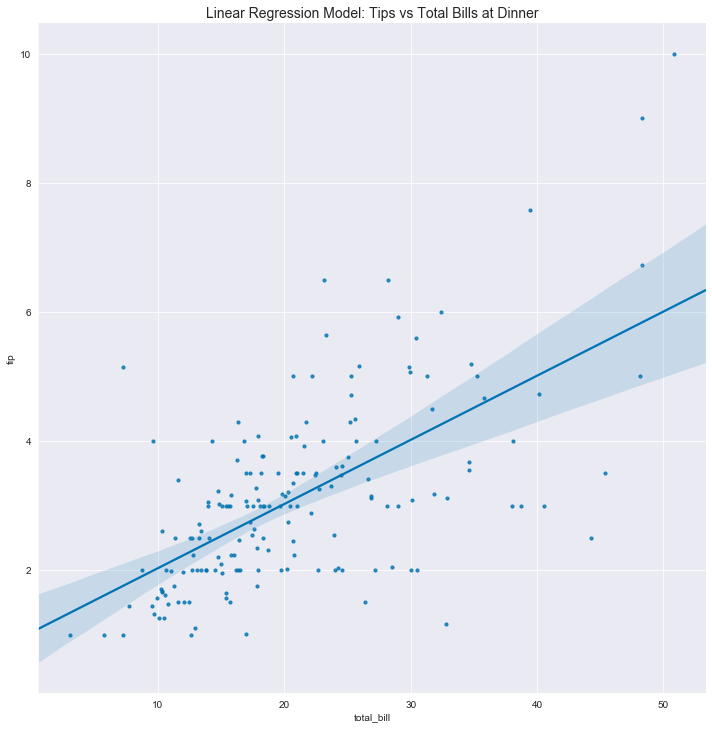

In [103]:
dfDinner = df.query('time == "Dinner"')

sns.lmplot(x="total_bill", y="tip", data=dfDinner , ci=95, scatter_kws={"s": 10}, height=10)
plt.title('Linear Regression Model: Tips vs Total Bills at Dinner', fontsize=14)

The linear regression plot looks quite representative. Next we will calculate the $R^2$ value:

In [104]:
# R Squared for Sunday
x = dfDinner["total_bill"]
y = dfDinner["tip"]

R = np.corrcoef(x, y)
print("Correlation Matrix (R): \n", R)
Rsq = R[0,1]**2
print("\nR Squared: ",Rsq)

Correlation Matrix (R): 
 [[1.         0.63287125]
 [0.63287125 1.        ]]

R Squared:  0.4005260152611945


In [105]:
PF = np.polyfit(x, y, 1)
print("Polyfit for Lunchtime: ")
print("m: %10.8f\nc: %10.8f" % (PF[0], PF[1]))

Polyfit for Lunchtime: 
m: 0.09942615
c: 1.03488896


In [106]:
C = np.sum((y - (PF[0] * x) - PF[1])**2)
print("Cost for Lunchtime: ", C)

Cost for Lunchtime:  216.40342129028696


The results are as follows:
* $R^2$: Around 40.05%
* Cost: Approx 216.40

These results are not as good as those for Lunch - this is actually a slightly worse fit than for the overall dataset.

#### Results

The impact of breaking it down by mealtime is somewhat difficult to judge - at lunchtime, the model is very encouraging, but at dinner time it is actually slightly worse. IT will therefore be necessary to consider further options in order to determine how tip size and total bill size are related.

## References